In [ ]:
# Training Data - Training_Data_set_cell1(contains cell-1 data at all temperatures)-UDDS drivecycle
# Test Data     - Cell2 UDDS cycle at temperature 25


## Importing Functions From Libraries 

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

                  #handling data
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
                 #scaling and splitting data
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
                #build and train model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
                #save and load the model
from tensorflow.keras.models import load_model
                #evaluate model
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score 



print(tf.__version__)

C:\Users\RECL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\RECL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\RECL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\RECL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

1.14.0


***Open training and testing files.
If the files are in the same folder where we are writing the code file, we can just mention file name. Else we need to mention full path with \\(double back slashes)

## Loading the data from location in the PC

In [6]:
traindata = pd.read_excel("File Name or File Path")
preddata = pd.read_excel("File Name or File Path")

In [7]:
traindata

,SoC,Current,Voltage,Temperature
0,0.000055,0.476074,3.454285,-10
1,0.000110,0.476074,3.456116,-10
2,0.000166,0.476074,3.457642,-10
3,0.000221,0.476074,3.458557,-10
4,0.000276,0.476074,3.459778,-10
...,...,...,...,...
124995,0.633843,0.001607,3.878180,25
124996,0.633841,0.001677,3.878179,25
124997,0.633834,0.001705,3.878169,25
124998,0.633830,0.001166,3.878165,25


## Checking for missing values

In [8]:
traindata.isna().sum()  #checks if there are NA values in the file anywhere and give the total number of rows having NA values 
traindata = traindata.dropna() # deletes the rows containing NA values from the data file.

***Splitting the data into training and validation data

In the total data, 25% of the data is seperated and used as validation data. 


traindata

In [9]:
X = traindata.drop('SoC',axis=1).values #drops SoC column from training data
y = traindata['SoC'].values #copies SoC column to the variable y.

# .values  will convert the data into array format

In [10]:
X

array([[ 4.760740e-01,  3.454285e+00, -1.000000e+01],
       [ 4.760740e-01,  3.456116e+00, -1.000000e+01],
       [ 4.760740e-01,  3.457642e+00, -1.000000e+01],
       ...,
       [ 1.705000e-03,  3.878169e+00,  2.500000e+01],
       [ 1.166000e-03,  3.878165e+00,  2.500000e+01],
       [ 1.534000e-03,  3.878169e+00,  2.500000e+01]])

In [11]:
y

array([5.50000e-05, 1.10000e-04, 1.66000e-04, ..., 6.33834e-01,
       6.33830e-01, 6.33833e-01])

In [12]:
X.size


375000

In [13]:
y.size

125000

In [12]:
train_in, valid_in , train_out,valid_out = train_test_split(X,y,test_size=0.25,random_state=100)

#Splits X into train_in & valid_in  and 'y' into train_out,valid_out

train_out   

array([0.97344 , 0.213848, 0.623228, ..., 0.246185, 0.997698, 0.134019])

In [9]:
scaler = MinMaxScaler() # builtin function used to normalize the data 

train_in = scaler.fit_transform(train_in) 
valid_in= scaler.transform(valid_in)


pred_in = preddata.drop('SoC', axis=1).values #drops SoC column from prediction data and assigns to pred_in
pred_in = scaler.transform(pred_in) # normalizes pred_in values
pred_out = preddata['SoC'].values  # #copies SoC column to pred_out



In [ ]:
model = Sequential() # function used to create multiple layers 

model.add(Dense(3,activation='relu')) # adds 3 neurons to the 1st layer with activation function=relu.
                                      # 1st layer is always input layer 

model.add(Dense(10,activation='relu')) # hidden layer with 10 neurons
model.add(Dense(10,activation='relu')) # hidden layer with 10 neurons
model.add(Dense(10,activation='relu')) # hidden layer with 10 neurons

model.add(Dense(1))                    # output layer with single neuron.

model.compile(optimizer='adam',loss='mse') #function used to compile the model.Different optimizers can be used

In [11]:
model.fit(x=train_in, y=train_out,validation_data=(valid_in,valid_out), batch_size=256,epochs=100)  

#function used to train the model with specified batch size and epochs         

Train on 93750 samples, validate on 31250 samples
Epoch 1/100
93750/93750 [==============================] - 1s 5us/sample - loss: 0.0839 - val_loss: 0.0091
Epoch 2/100
93750/93750 [==============================] - 0s 3us/sample - loss: 0.0058 - val_loss: 0.0028
Epoch 3/100
93750/93750 [==============================] - 0s 3us/sample - loss: 0.0017 - val_loss: 0.0012
Epoch 4/100
93750/93750 [==============================] - 0s 3us/sample - loss: 9.4046e-04 - val_loss: 8.0576e-04
Epoch 5/100
93750/93750 [==============================] - 0s 3us/sample - loss: 6.9850e-04 - val_loss: 6.3184e-04
Epoch 6/100
93750/93750 [==============================] - 0s 3us/sample - loss: 6.0722e-04 - val_loss: 6.3057e-04
Epoch 7/100
93750/93750 [==============================] - 0s 3us/sample - loss: 5.7527e-04 - val_loss: 6.1179e-04
Epoch 8/100
93750/93750 [==============================] - 0s 3us/sample - loss: 5.6346e-04 - val_loss: 5.9120e-04
Epoch 9/100
93750/93750 [=============================

In [55]:
loss = pd.DataFrame(model.history.history) #gives the values of training loss for each epoch.
loss


,loss,val_loss
0,0.122662,0.080465
1,0.072947,0.057614
2,0.022274,0.009520
3,0.009278,0.008903
4,0.008940,0.008712
...,...,...
95,0.008149,0.008040
96,0.008173,0.007988
97,0.008148,0.008004
98,0.008146,0.008003


Text(0, 0.5, 'Loss')

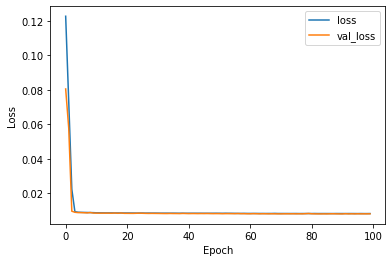

In [56]:
loss.plot()           #to plot the loss values
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [57]:
predictions = model.predict(pred_in) #function used to predict the output of new data.


In [58]:
#creating a table to easily compare true,predicted and error values

True_value = pd.DataFrame(pred_out)
predected_value = pd.DataFrame(predictions)
Error = predected_value - True_value
Error = Error.abs()  # converts -ve numbers into +ve

compare = pd.concat([True_value,predected_value,Error],axis=1)
compare.columns = ['True_value','predected_value','Error']
Error.columns=['Error']


compare     



,True_value,predected_value,Error
0,0.761681,0.842441,0.080760
1,0.761756,0.842627,0.080871
2,0.761826,0.842586,0.080760
3,0.761891,0.842562,0.080671
4,0.761957,0.842553,0.080596
...,...,...,...
11371,0.622695,0.587844,0.034851
11372,0.622738,0.587924,0.034814
11373,0.622649,0.587754,0.034895
11374,0.622686,0.587837,0.034849


In [59]:
Error.max()
# gives maximum error value  

Error    0.252947
dtype: float64

In [60]:
np.sqrt(mean_squared_error(pred_out,predictions)) #RMS error

0.052479724157942706

In [61]:
mean_absolute_error(pred_out,predictions)

0.04013360012344569

In [64]:
# model.save('explain.h5')   #saves the mofel to "explain" in .h5 format

In [ ]:
# model = load_model('explain.h5')  # Loads the trained model along with the weights 